In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ukraine-personnel-losses/UKR_ModRUS_Personnel.csv
/kaggle/input/ukraine-equipment-losses/UKR_ModRUS_Equipment.csv
/kaggle/input/ukr-modrus-equipmentpersonnel/UKR_ModRUS_EquipmentPersonnel.xlsx


In [2]:
# create dataframes
ukr_ploss = pd.read_csv('/kaggle/input/ukraine-personnel-losses/UKR_ModRUS_Personnel.csv')
ukr_eloss = pd.read_csv('/kaggle/input/ukraine-equipment-losses/UKR_ModRUS_Equipment.csv')

In [3]:
# first few rows of data
ukr_ploss.head()

,Date,Killed,Surrendered
0,2/24/2022,0,0
1,2/25/2022,0,243
2,2/26/2022,0,243
3,2/27/2022,495,243
4,2/28/2022,495,243


In [4]:
ukr_ploss.tail()

,Date,Killed,Surrendered
1033,12/22/2024,750892,2917
1034,12/23/2024,752552,2917
1035,12/24/2024,754032,2917
1036,12/25/2024,755527,2917
1037,12/26/2024,757032,2917


In [5]:
ukr_eloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1028 non-null   object
 1   UAVs              1028 non-null   int64 
 2   SpecialEquipment  1028 non-null   int64 
 3   Artillery         1028 non-null   int64 
 4   ArmouredVehicles  1028 non-null   int64 
 5   Aircraft          1028 non-null   int64 
 6   AntiAircraft      1028 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 56.3+ KB


In [6]:
# no null entries
ukr_ploss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1038 non-null   object
 1   Killed       1038 non-null   int64 
 2   Surrendered  1038 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.5+ KB


In [7]:
#merge datframes
ukr_losses = ukr_ploss.merge(ukr_eloss, on='Date', how='outer')
ukr_losses = ukr_losses.fillna(0)
ukr_losses.head()

,Date,Killed,Surrendered,UAVs,SpecialEquipment,Artillery,ArmouredVehicles,Aircraft,AntiAircraft
0,2/24/2022,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2/25/2022,0,243,0.0,0.0,0.0,0.0,0.0,0.0
2,2/26/2022,0,243,0.0,0.0,0.0,0.0,0.0,0.0
3,2/27/2022,495,243,0.0,0.0,0.0,0.0,0.0,0.0
4,2/28/2022,495,243,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
ukr_losses['Daily Killed'] = ukr_losses['Killed'].diff()
ukr_losses['Daily Killed'] = ukr_losses['Daily Killed'].fillna(0)
ukr_losses.drop(columns=['Surrendered'])

,Date,Killed,UAVs,SpecialEquipment,Artillery,ArmouredVehicles,Aircraft,AntiAircraft,Daily Killed
0,2/24/2022,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2/25/2022,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2/26/2022,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2/27/2022,495,0.0,0.0,0.0,0.0,0.0,0.0,495.0
4,2/28/2022,495,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1033,12/22/2024,750892,38341.0,29427.0,21436.0,19952.0,933.0,590.0,1575.0
1034,12/23/2024,752552,38355.0,29452.0,21457.0,19961.0,933.0,590.0,1660.0
1035,12/24/2024,754032,38420.0,29469.0,21473.0,19967.0,933.0,590.0,1480.0
1036,12/25/2024,755527,38539.0,29490.0,21495.0,19969.0,933.0,590.0,1495.0


In [9]:
ukr_losses['Date'] = pd.to_datetime(ukr_losses['Date'])
ukr_losses.head()

,Date,Killed,Surrendered,UAVs,SpecialEquipment,Artillery,ArmouredVehicles,Aircraft,AntiAircraft,Daily Killed
0,2022-02-24,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-02-25,0,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-02-26,0,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-02-27,495,243,0.0,0.0,0.0,0.0,0.0,0.0,495.0
4,2022-02-28,495,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Date'>

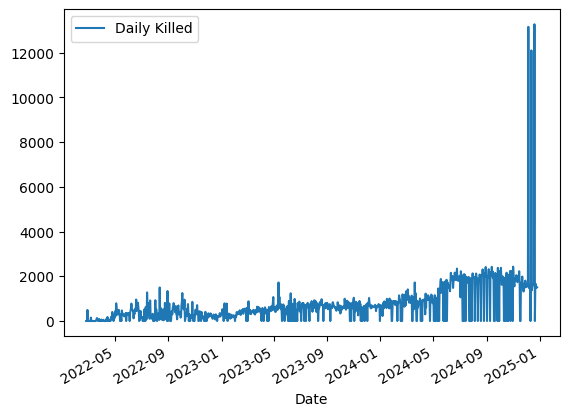

In [10]:
ukr_losses.plot(x='Date', y='Daily Killed', kind='line')

<Axes: title={'center': 'Daily Deaths for 2022'}, xlabel='Date'>

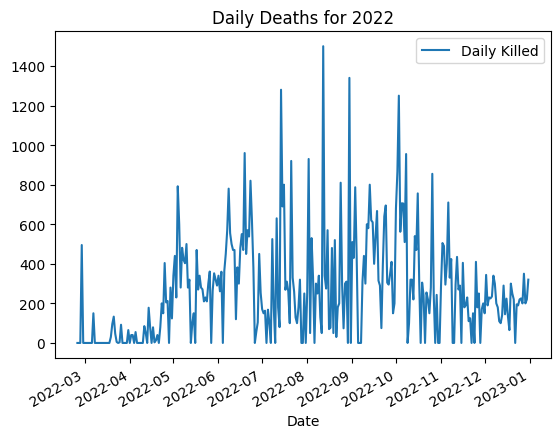

In [11]:
ukr_2022 = ukr_losses[ukr_losses['Date'].dt.year == 2022]
ukr_2022.plot(x='Date', y='Daily Killed', kind='line', 
              title= 'Daily Deaths for 2022')

<Axes: title={'center': 'Daily Deaths for 2023'}, xlabel='Date'>

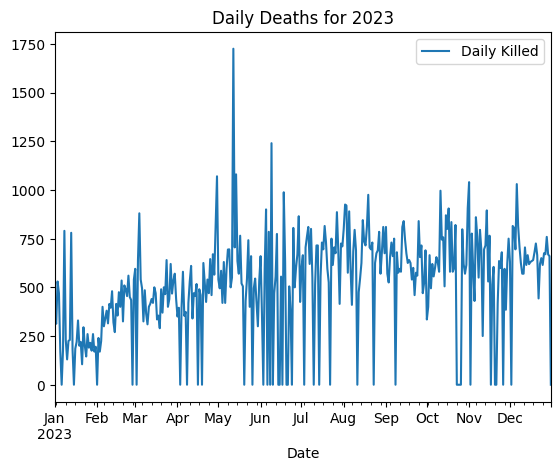

In [12]:
ukr_2023 = ukr_losses[ukr_losses['Date'].dt.year == 2023]
ukr_2023.plot(x='Date', y='Daily Killed', kind='line', 
              title= 'Daily Deaths for 2023')

<Axes: title={'center': 'Daily Deaths for 2024'}, xlabel='Date'>

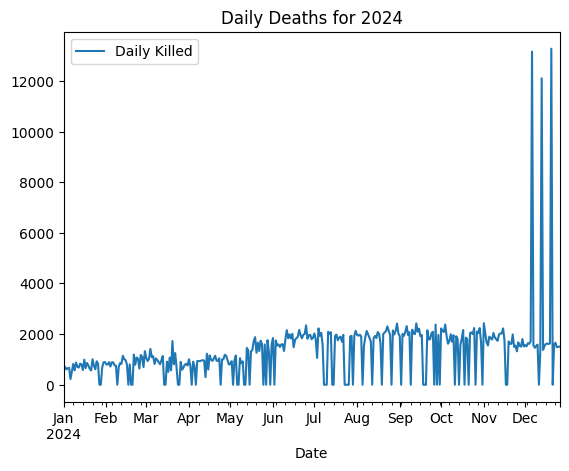

In [13]:
ukr_2024 = ukr_losses[ukr_losses['Date'].dt.year == 2024]
ukr_2024.plot(x='Date', y='Daily Killed', kind='line', 
              title= 'Daily Deaths for 2024')

<Axes: title={'center': 'Daily Deaths for 2024'}, ylabel='Frequency'>

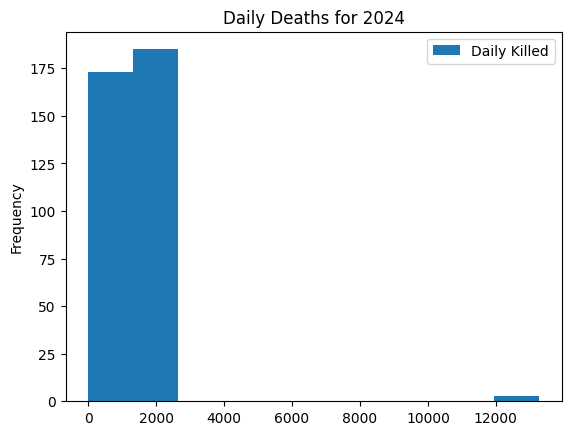

In [14]:
ukr_2024.plot(x='Date', y='Daily Killed', kind='hist', 
              title= 'Daily Deaths for 2024')

<Axes: >

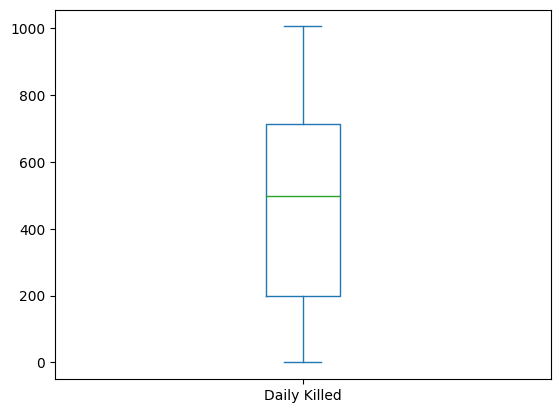

In [15]:
ukr_jan = ukr_losses[ukr_losses['Date'].dt.month == 1]
ukr_jan.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

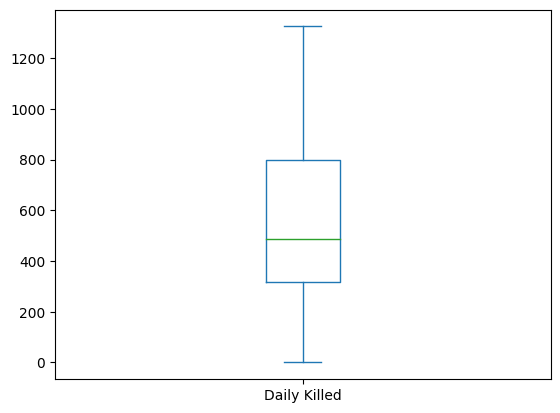

In [16]:
ukr_feb = ukr_losses[ukr_losses['Date'].dt.month == 2]
ukr_feb
ukr_feb.plot(x='Date',y='Daily Killed', kind='box')

<Axes: >

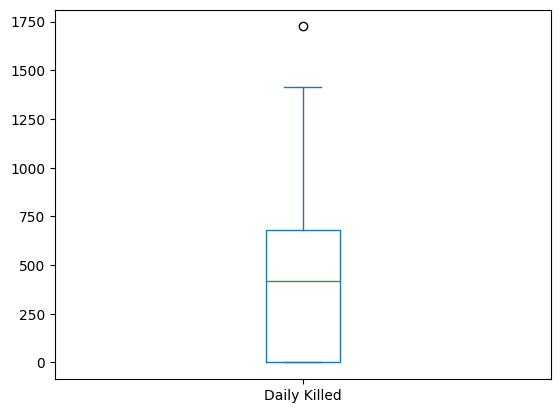

In [17]:
ukr_march = ukr_losses[ukr_losses['Date'].dt.month == 3]
ukr_march.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

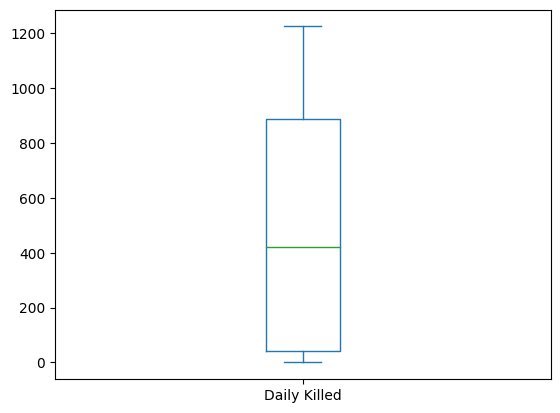

In [18]:
ukr_april = ukr_losses[ukr_losses['Date'].dt.month == 4]
ukr_april.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

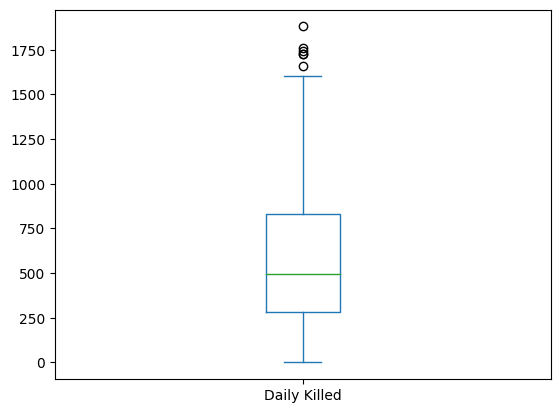

In [19]:
ukr_may = ukr_losses[ukr_losses['Date'].dt.month == 5]
ukr_may.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

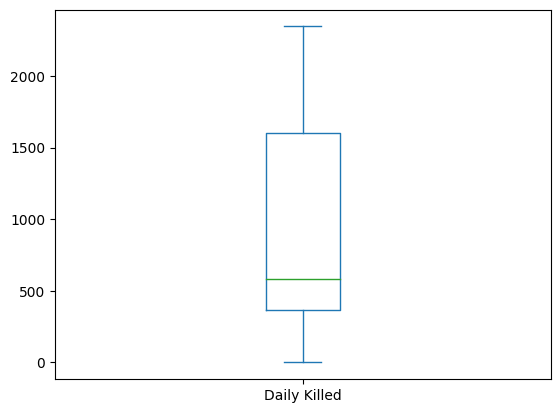

In [20]:
ukr_june = ukr_losses[ukr_losses['Date'].dt.month == 6]
ukr_june.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

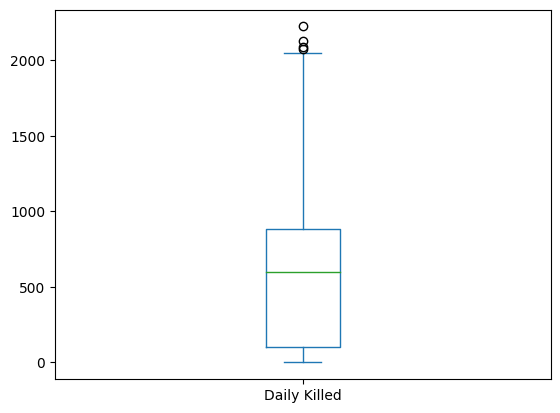

In [21]:
ukr_july = ukr_losses[ukr_losses['Date'].dt.month == 7]
ukr_july.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

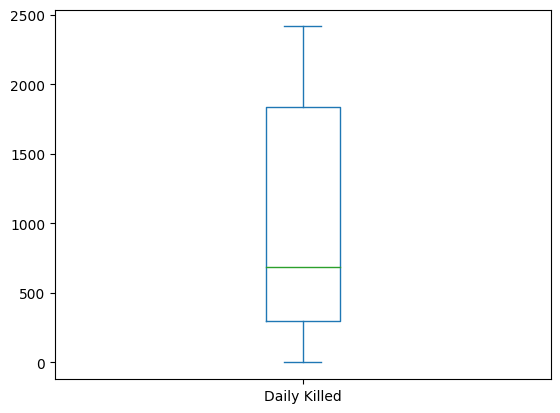

In [22]:
ukr_aug = ukr_losses[ukr_losses['Date'].dt.month == 8]
ukr_aug.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

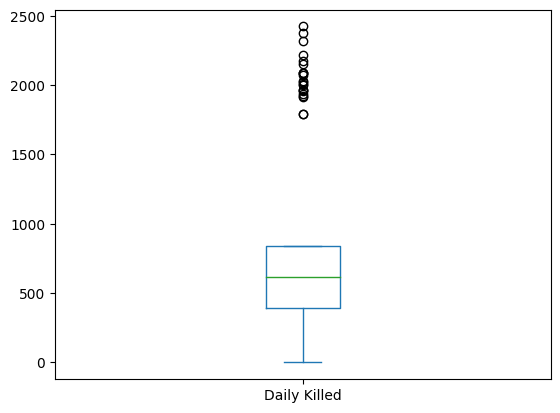

In [23]:
ukr_sep = ukr_losses[ukr_losses['Date'].dt.month == 9]
ukr_sep.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

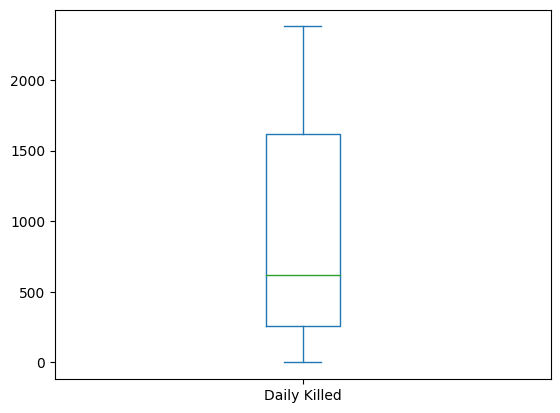

In [24]:
ukr_oct = ukr_losses[ukr_losses['Date'].dt.month == 10]
ukr_oct.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

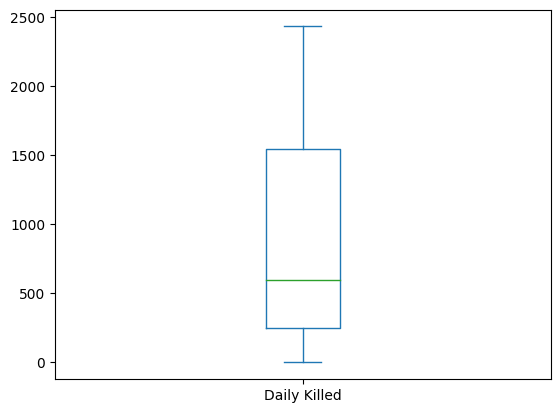

In [25]:
ukr_nov = ukr_losses[ukr_losses['Date'].dt.month == 11]
ukr_nov.plot(x='Date', y='Daily Killed', kind='box')

<Axes: >

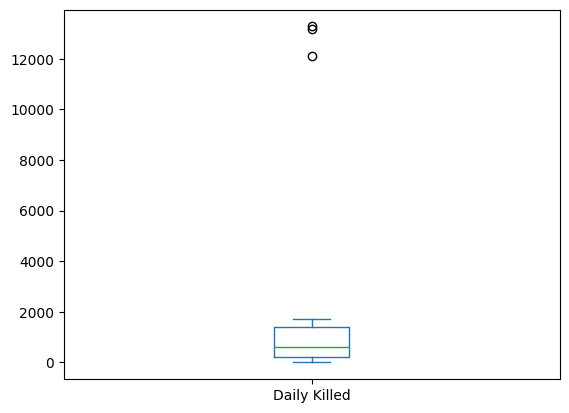

In [26]:
ukr_dec = ukr_losses[ukr_losses['Date'].dt.month == 12]
ukr_dec.plot(x='Date', y='Daily Killed', kind='box')

<Axes: xlabel='Date'>

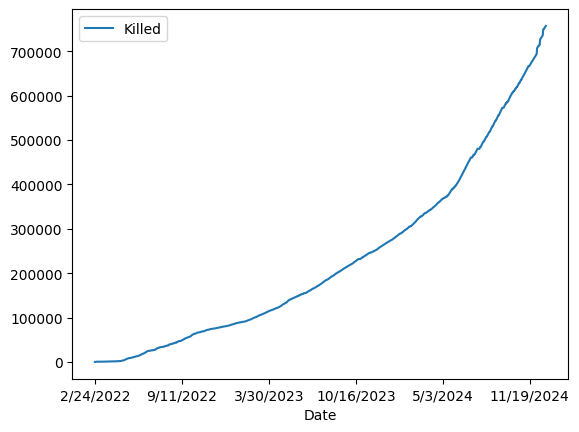

In [27]:
ukr_ploss.plot(x='Date' , y='Killed' , kind='line')

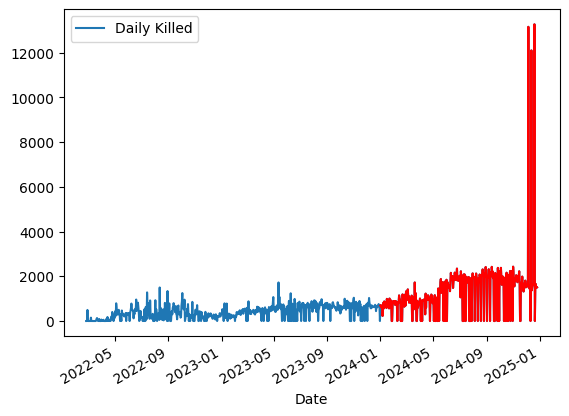

In [28]:
ukr_losses.plot(x='Date' , y='Daily Killed' , kind='line')
plt.plot(ukr_2024['Date'],ukr_2024['Daily Killed'], color='red')

In [29]:
# find median of each month, then change code to find total death toll of each month
print(ukr_jan['Daily Killed'].sum())
print(ukr_feb['Daily Killed'].sum())
print(ukr_march['Daily Killed'].sum())
print(ukr_april['Daily Killed'].sum())
print(ukr_may['Daily Killed'].sum())
print(ukr_june['Daily Killed'].sum())
print(ukr_july['Daily Killed'].sum())
print(ukr_aug['Daily Killed'].sum())
print(ukr_sep['Daily Killed'].sum())
print(ukr_oct['Daily Killed'].sum())
print(ukr_nov['Daily Killed'].sum())
print(ukr_dec['Daily Killed'].sum())

28923.0
33306.0
40183.0
41399.0
56851.0
78919.0
66659.0
84714.0
76172.0
79166.0
73476.0
97264.0


<Axes: xlabel='Month'>

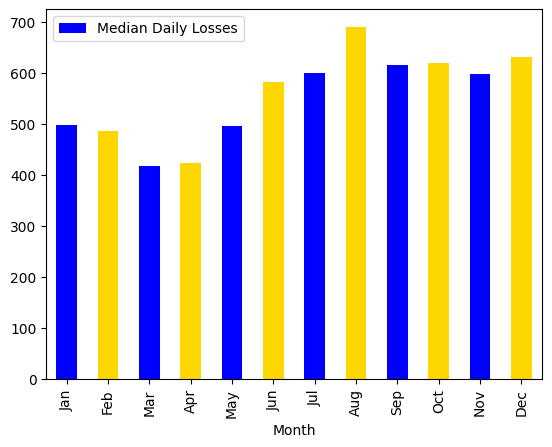

In [30]:
#Bar graph of median daily losses by month
#Use for hypothesis
month_med = [
{'Month' : "Jan", "Median Daily Losses" : 497.5},
{'Month' : 'Feb', 'Median Daily Losses' : 485},
{'Month' : 'Mar', 'Median Daily Losses' : 417.5},
{'Month' : 'Apr', 'Median Daily Losses' : 422.5},
{'Month' : 'May', 'Median Daily Losses' : 495},
{'Month' : 'Jun', 'Median Daily Losses' : 582.5},
{'Month' : 'Jul', 'Median Daily Losses' : 600},
{'Month' : 'Aug', 'Median Daily Losses' : 690},
{'Month' : 'Sep', 'Median Daily Losses' : 615},
{'Month' : 'Oct', 'Median Daily Losses' : 620},
{'Month' : 'Nov', 'Median Daily Losses' : 597},
{'Month' : 'Dec', 'Median Daily Losses' : 630},
]

month_med_loss = pd.DataFrame(month_med)
month_med_loss.plot(x='Month', y='Median Daily Losses', kind='bar', color=['blue' if i % 2 == 0 else 'gold' for i in range(len(month_med_loss))])

<Axes: xlabel='Month'>

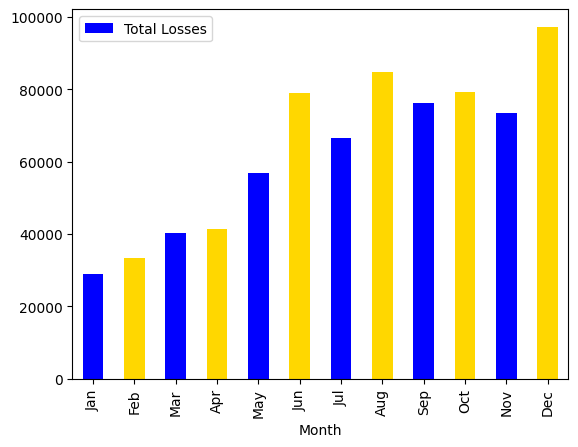

In [31]:
# Bar Graph of total losses of each month
# Use for hypothesis
month_total = [
{'Month' : "Jan", "Total Losses" : 28923},
{'Month' : 'Feb', 'Total Losses' : 33306},
{'Month' : 'Mar', 'Total Losses' : 40183},
{'Month' : 'Apr', 'Total Losses' : 41399},
{'Month' : 'May', 'Total Losses' : 56851},
{'Month' : 'Jun', 'Total Losses' : 78919},
{'Month' : 'Jul', 'Total Losses' : 66659},
{'Month' : 'Aug', 'Total Losses' : 84714},
{'Month' : 'Sep', 'Total Losses' : 76172},
{'Month' : 'Oct', 'Total Losses' : 79166},
{'Month' : 'Nov', 'Total Losses' : 73476},
{'Month' : 'Dec', 'Total Losses' : 97264},
]

month_total_loss = pd.DataFrame(month_total)
month_total_loss.plot(x='Month', y='Total Losses', kind='bar', color=['blue' if i % 2 == 0 else 'gold' for i in range(len(month_total_loss))])

In [32]:
#visualizing equipment losses
ukr_losses.head()

,Date,Killed,Surrendered,UAVs,SpecialEquipment,Artillery,ArmouredVehicles,Aircraft,AntiAircraft,Daily Killed
0,2022-02-24,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-02-25,0,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-02-26,0,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-02-27,495,243,0.0,0.0,0.0,0.0,0.0,0.0,495.0
4,2022-02-28,495,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0


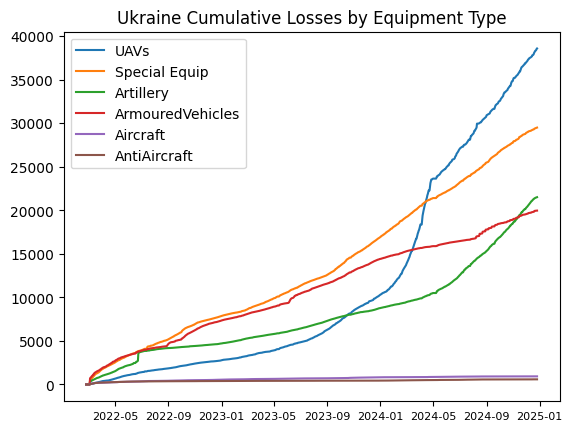

In [33]:
plt.plot(ukr_losses['Date'], ukr_losses['UAVs'], label='UAVs')
plt.plot(ukr_losses['Date'], ukr_losses['SpecialEquipment'], label='Special Equip')
plt.plot(ukr_losses['Date'], ukr_losses['Artillery'], label='Artillery')
plt.plot(ukr_losses['Date'], ukr_losses['ArmouredVehicles'], label='ArmouredVehicles')
plt.plot(ukr_losses['Date'], ukr_losses['Aircraft'], label='Aircraft')
plt.plot(ukr_losses['Date'], ukr_losses['AntiAircraft'], label='AntiAircraft')

plt.title('Ukraine Cumulative Losses by Equipment Type')
plt.xticks(fontsize=8)
plt.legend()

In [34]:
# new columns for Daily Equipment Losses by Type

ukr_losses['UAV Daily'] = ukr_losses['UAVs'].diff()
ukr_losses['SpecialEquip Daily'] = ukr_losses['SpecialEquipment'].diff()
ukr_losses['Artillery Daily'] = ukr_losses['Artillery'].diff()
ukr_losses['ArmouredVehicles Daily'] = ukr_losses['ArmouredVehicles'].diff()
ukr_losses['Aircraft Daily'] = ukr_losses['Aircraft'].diff()
ukr_losses['AntiAircraft Daily'] = ukr_losses['AntiAircraft'].diff()

ukr_losses = ukr_losses.fillna(0)
ukr_losses.head()

,Date,Killed,Surrendered,UAVs,SpecialEquipment,Artillery,ArmouredVehicles,Aircraft,AntiAircraft,Daily Killed,UAV Daily,SpecialEquip Daily,Artillery Daily,ArmouredVehicles Daily,Aircraft Daily,AntiAircraft Daily
0,2022-02-24,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-02-25,0,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-02-26,0,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-02-27,495,243,0.0,0.0,0.0,0.0,0.0,0.0,495.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-02-28,495,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


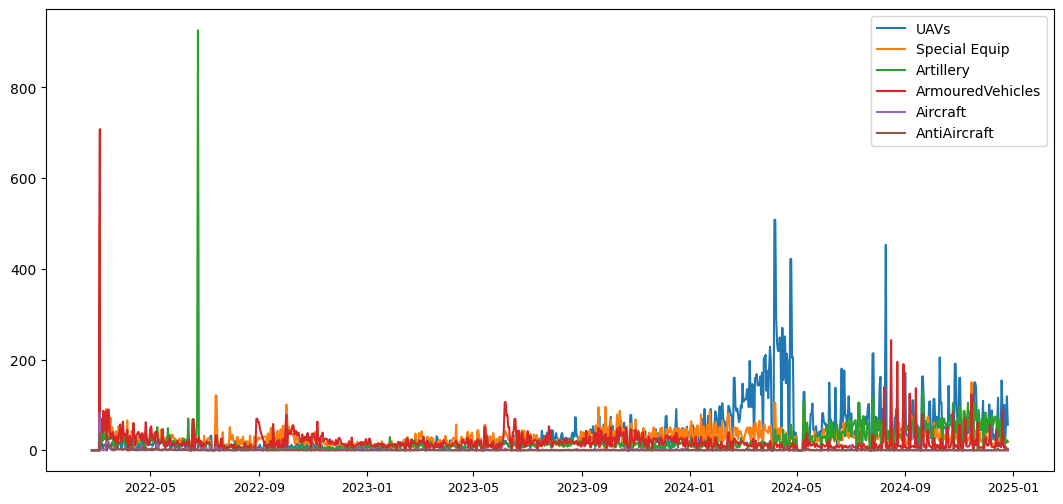

In [35]:
plt.figure(figsize=(13,6))
plt.plot(ukr_losses['Date'], ukr_losses['UAV Daily'], label='UAVs')
plt.plot(ukr_losses['Date'], ukr_losses['SpecialEquip Daily'], label='Special Equip')
plt.plot(ukr_losses['Date'], ukr_losses['Artillery Daily'], label='Artillery')
plt.plot(ukr_losses['Date'], ukr_losses['ArmouredVehicles Daily'], label='ArmouredVehicles')
plt.plot(ukr_losses['Date'], ukr_losses['Aircraft Daily'], label='Aircraft')
plt.plot(ukr_losses['Date'], ukr_losses['AntiAircraft Daily'], label='AntiAircraft')

plt.xticks(fontsize=9)
plt.legend()

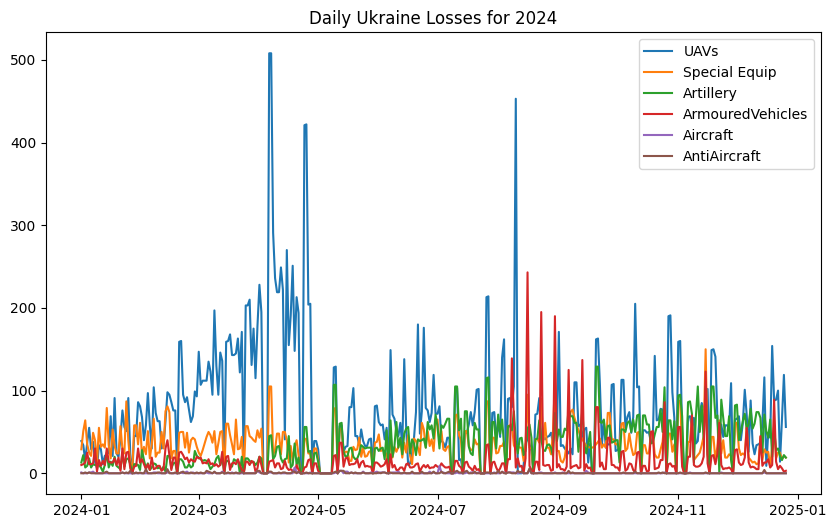

In [36]:
#use for hypothesis
ukr_2024 = ukr_losses[ukr_losses['Date'].dt.year == 2024]

plt.figure(figsize=(10,6))

plt.plot(ukr_2024['Date'], ukr_2024['UAV Daily'], label='UAVs')
plt.plot(ukr_2024['Date'], ukr_2024['SpecialEquip Daily'], label='Special Equip')
plt.plot(ukr_2024['Date'], ukr_2024['Artillery Daily'], label='Artillery')
plt.plot(ukr_2024['Date'], ukr_2024['ArmouredVehicles Daily'], label='ArmouredVehicles')
plt.plot(ukr_2024['Date'], ukr_2024['Aircraft Daily'], label='Aircraft')
plt.plot(ukr_2024['Date'], ukr_2024['AntiAircraft Daily'], label='AntiAircraft')

plt.title('Daily Ukraine Losses for 2024')
plt.legend()

In [37]:
#ratio for equipment to personnel
#correlation heat map for equipment and personnel
#LR Model for predicting trends for deaths

Text(0.5, 1.0, 'Total Equipment Losses by Type')

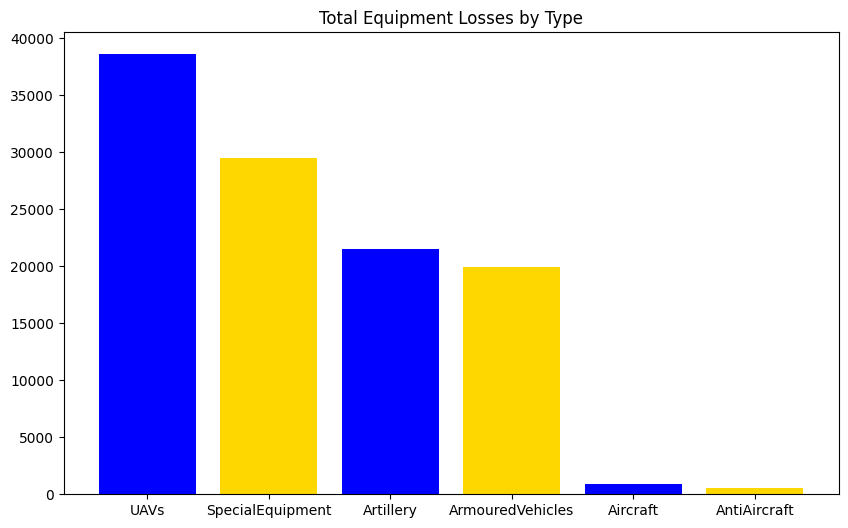

In [38]:
#maxes to get ratios
#use for hypothesis
ukr_max = ukr_losses.drop(columns=['Date','Killed','Surrendered','Daily Killed','UAV Daily','SpecialEquip Daily',
                                  'Artillery Daily','ArmouredVehicles Daily','Aircraft Daily',
                                  'AntiAircraft Daily']).max()
plt.figure(figsize=(10,6))
plt.bar(ukr_max.index, ukr_max, color=['blue' if i % 2 == 0 else 'gold' for i in range(len(ukr_max))])
plt.title('Total Equipment Losses by Type')

In [39]:
ukr_losses.max()

Date                      2024-12-26 00:00:00
Killed                                 757032
Surrendered                              2917
UAVs                                  38595.0
SpecialEquipment                      29509.0
Artillery                             21514.0
ArmouredVehicles                      19972.0
Aircraft                                933.0
AntiAircraft                            590.0
Daily Killed                          13274.0
UAV Daily                               508.0
SpecialEquip Daily                      505.0
Artillery Daily                         926.0
ArmouredVehicles Daily                  708.0
Aircraft Daily                           82.0
AntiAircraft Daily                       38.0
dtype: object

In [40]:
ukr_max/1038

UAVs                37.182081
SpecialEquipment    28.428709
Artillery           20.726397
ArmouredVehicles    19.240848
Aircraft             0.898844
AntiAircraft         0.568401
dtype: float64

In [41]:
#troops lost per day
757032/1038

729.3179190751445

In [42]:
#Troops lost for every UAV
757032/38595.0

19.61476875242907

Text(0.5, 1.0, 'Ukrainian Losses Correlation Map')

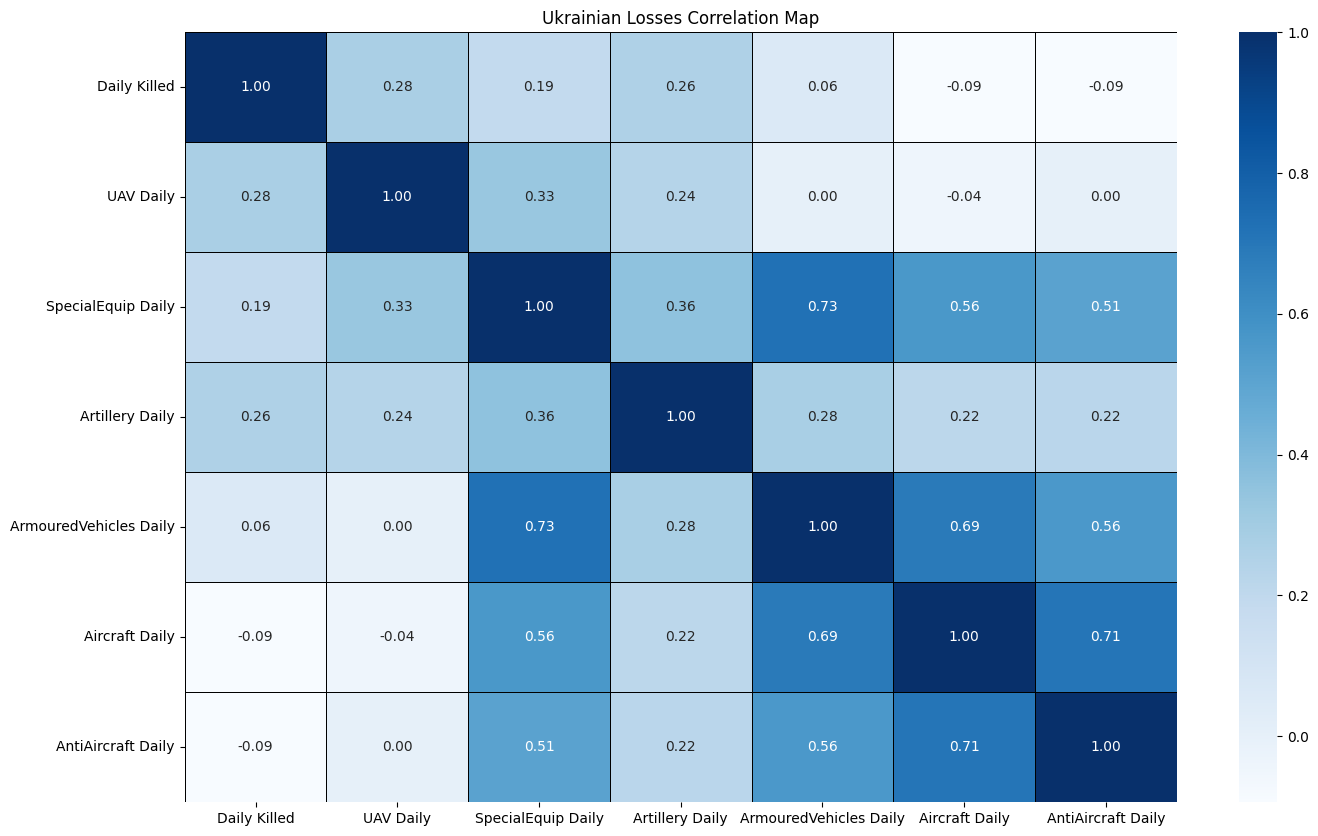

In [43]:
#correlation heat map
ukr_filter = ukr_losses.drop(columns=['Date','Surrendered','Killed','UAVs','SpecialEquipment',
                                  'Artillery','ArmouredVehicles','Aircraft',
                                  'AntiAircraft'])

ukr_correlation = ukr_filter.apply(pd.to_numeric, errors='coerce')

correlation_matrix = ukr_correlation.corr()

fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5,
    linecolor='black',
    ax=ax
)

plt.title('Ukrainian Losses Correlation Map')

<Axes: >

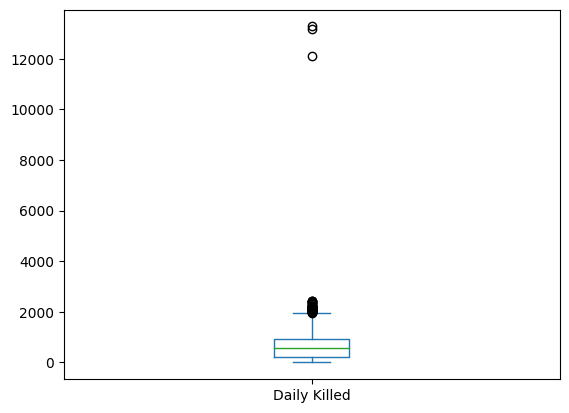

In [44]:
#box plot of all days of losses
ukr_losses.plot(y='Daily Killed', kind='box')

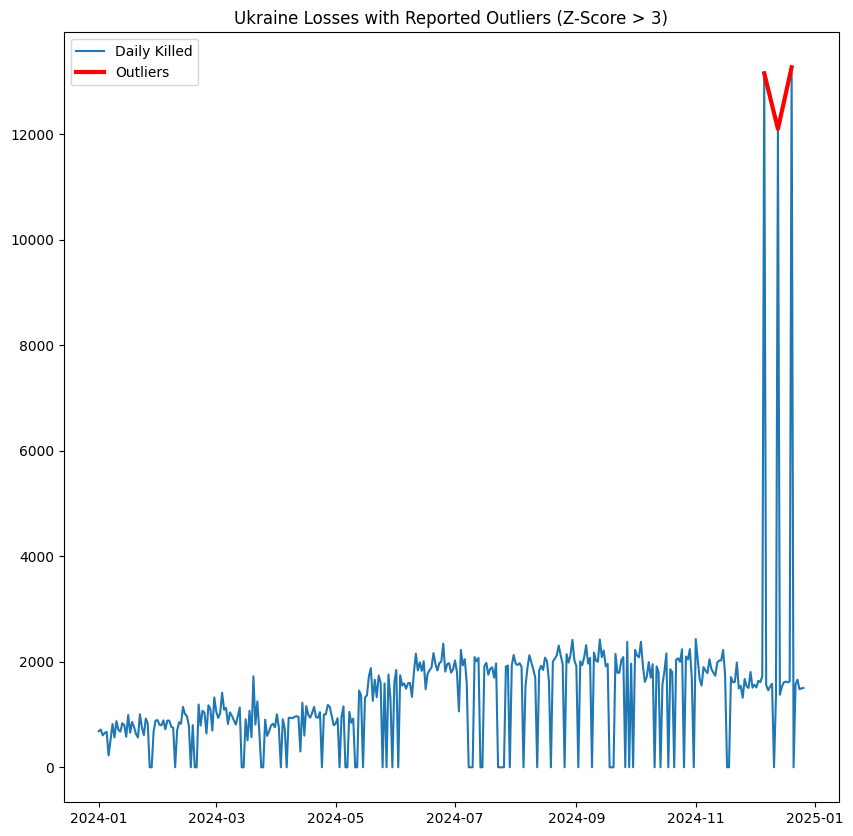

In [45]:
# Z-score graph of potential outliers
# Use for hypothesis

ukr_losses['Z-Score'] = (ukr_losses['Daily Killed'] - ukr_losses['Daily Killed'].mean())/ukr_losses['Daily Killed'].std()
ukr_outliers = ukr_losses[ukr_losses['Z-Score'] > 3] # any outliers would be 3 or more standard deviations away

plt.figure(figsize=(10,10))
plt.plot(ukr_2024['Date'],ukr_2024['Daily Killed'], label='Daily Killed')
plt.plot(ukr_outliers['Date'], ukr_outliers['Daily Killed'], label='Outliers', color='red', linewidth=3)
plt.title('Ukraine Losses with Reported Outliers (Z-Score > 3)')
plt.legend()

In [46]:
# Creating new column if days since war started

start_date = pd.Timestamp('2022-02-24')
ukr_losses['Days Since Start'] = (ukr_losses['Date'] - start_date).dt.days

In [47]:
# Features

inputs = ukr_losses[['Days Since Start']]
outputs = ukr_losses[['Daily Killed']]

In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
inputs_poly = poly.fit_transform(inputs)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(inputs_poly, outputs, test_size=0.2, random_state=42)

from sklearn.linear_model import Ridge
model_poly = Ridge(alpha=1.0)
model_poly.fit(X_train_poly, y_train_poly)

predictions = model_poly.predict(X_test_poly)

mse_losses = mean_squared_error(y_test_poly, predictions, squared=False)

In [49]:
from math import floor

data = {'Days Since Started' : [day for day in range(1088, 1088 + 5)]}
future_predictions = model_poly.predict(poly.fit_transform(pd.DataFrame(data)))

future_predictions = pd.DataFrame(future_predictions, columns=['Daily Killed'])
future_predictions = future_predictions['Daily Killed'].apply(lambda x: floor(x))

future_predictions 

0    2364
1    2369
2    2373
3    2378
4    2383
Name: Daily Killed, dtype: int64

Text(0, 0.5, 'Daily Personnel Losses')

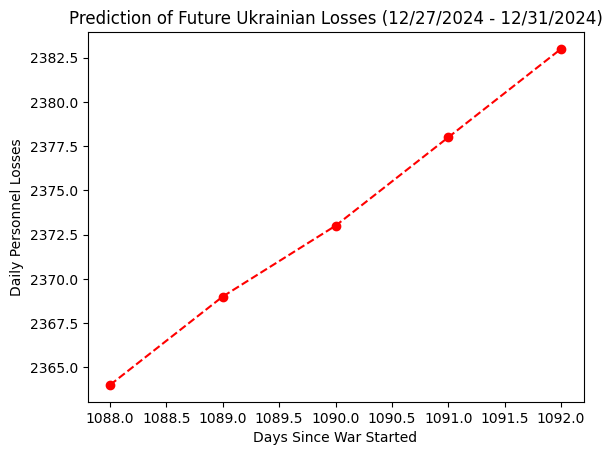

In [50]:
# use for hypotheses

future_pred = pd.DataFrame({
'Days Since Start' : data['Days Since Started'], 
'Next Five Days Prediction' : future_predictions
})

plt.plot(future_pred['Days Since Start'], future_pred['Next Five Days Prediction'], color='red', marker='o', linestyle='--')
plt.title('Prediction of Future Ukrainian Losses (12/27/2024 - 12/31/2024)')
plt.xlabel('Days Since War Started')
plt.ylabel('Daily Personnel Losses')

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
#Features

inputz = ukr_losses[['Days Since Start','UAV Daily','SpecialEquip Daily','Artillery Daily']]
outputz = ukr_losses[['Daily Killed']]

In [53]:
polee = PolynomialFeatures(degree=2)
inputz_poly = polee.fit_transform(inputz)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(inputz_poly, outputz, test_size=0.2, random_state=42)

poly_model = Ridge(alpha=1.0)
poly_model.fit(X_poly_train, y_poly_train)

prediction_poly = poly_model.predict(X_poly_test)

mse_poly = mean_squared_error(y_poly_test, prediction_poly, squared=False)

In [54]:
# Calculate a rolling mean for each feature
rolling_window = 7  # Use a 7-day rolling average (adjust as needed)
feature_trends = ukr_losses[['UAV Daily', 'SpecialEquip Daily', 'Artillery Daily']].rolling(rolling_window).mean()

# Use the most recent rolling average for future predictions
trend_values = feature_trends.iloc[-1]

future_data = pd.DataFrame({
    'Days Since Start': [day for day in range(1016, 1016 + 15)],
    'UAV Daily': trend_values['UAV Daily'],
    'SpecialEquip Daily': trend_values['SpecialEquip Daily'],
    'Artillery Daily': trend_values['Artillery Daily']
})

future_predict = poly_model.predict(polee.fit_transform(pd.DataFrame(future_data)))

future_predict = pd.DataFrame(future_predict, columns=['Daily Killed'])
future_predict = future_predict['Daily Killed'].apply(lambda x: floor(x))

future_predict

0     1912
1     1916
2     1920
3     1924
4     1929
5     1933
6     1937
7     1941
8     1945
9     1949
10    1953
11    1957
12    1961
13    1965
14    1969
Name: Daily Killed, dtype: int64

Text(0, 0.5, 'Daily Personnel Losses')

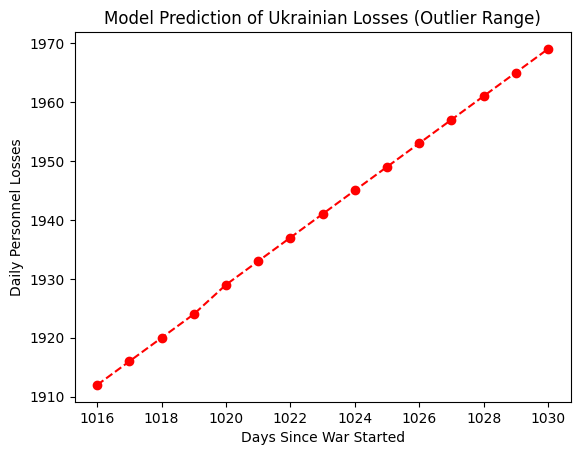

In [55]:
#Graph Rolling Average Model Predictions
#Use for Hypothesis

future_pre = pd.DataFrame({
'Days Since Start' : future_data['Days Since Start'], 
'Five Day Prediction' : future_predict
})

plt.plot(future_pre['Days Since Start'], future_pre['Five Day Prediction'], color='red', marker='o', linestyle='--')
plt.title('Model Prediction of Ukrainian Losses (Outlier Range)')
plt.xlabel('Days Since War Started')
plt.ylabel('Daily Personnel Losses')

In [56]:
ukr_outliers

,Date,Killed,Surrendered,UAVs,SpecialEquipment,Artillery,ArmouredVehicles,Aircraft,AntiAircraft,Daily Killed,UAV Daily,SpecialEquip Daily,Artillery Daily,ArmouredVehicles Daily,Aircraft Daily,AntiAircraft Daily,Z-Score
1017,2024-12-06,707083,2771,37354.0,29061.0,20582.0,19685.0,932.0,586.0,13160.0,70.0,58.0,53.0,55.0,0.0,0.0,13.699892
1024,2024-12-13,726668,2858,37633.0,29190.0,21049.0,19775.0,932.0,586.0,12105.0,37.0,44.0,67.0,45.0,0.0,0.0,12.537173
1031,2024-12-20,749317,2917,38152.0,29384.0,21378.0,19933.0,933.0,590.0,13274.0,88.0,58.0,54.0,89.0,0.0,0.0,13.825531
